# Regression model on Wine Quality dataset

This notebook provides boilerplate code for tacking a regression task, in which we are trying to predict a continuous response variable.

We'll use the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) from the UCI Machine Learning Repository as an example. Although the actual response variable here is a _discrete_ score, we'll treat it as continuous for the sake of simplicity.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-model-on-Wine-Quality-dataset" data-toc-modified-id="Regression-model-on-Wine-Quality-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression model on Wine Quality dataset</a></span><ul class="toc-item"><li><span><a href="#Data-prep" data-toc-modified-id="Data-prep-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data prep</a></span><ul class="toc-item"><li><span><a href="#Get-data" data-toc-modified-id="Get-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Data-transformations" data-toc-modified-id="Data-transformations-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Data transformations</a></span></li></ul></li><li><span><a href="#Verify-assumptions" data-toc-modified-id="Verify-assumptions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Verify assumptions</a></span><ul class="toc-item"><li><span><a href="#Assess-collinearity" data-toc-modified-id="Assess-collinearity-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Assess collinearity</a></span></li><li><span><a href="#Assess-multicollinearity" data-toc-modified-id="Assess-multicollinearity-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Assess multicollinearity</a></span></li><li><span><a href="#Data-quality" data-toc-modified-id="Data-quality-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Data quality</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Overview-of-DataFrame" data-toc-modified-id="Overview-of-DataFrame-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Overview of DataFrame</a></span></li><li><span><a href="#Distribution-of-response-variable" data-toc-modified-id="Distribution-of-response-variable-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Distribution of response variable</a></span></li><li><span><a href="#Correlation-w/-response" data-toc-modified-id="Correlation-w/-response-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Correlation w/ response</a></span></li><li><span><a href="#Correlation-between-predictors" data-toc-modified-id="Correlation-between-predictors-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Correlation between predictors</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Choosing-an-evaluation-metric" data-toc-modified-id="Choosing-an-evaluation-metric-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Choosing an evaluation metric</a></span></li></ul></li><li><span><a href="#Linear-models" data-toc-modified-id="Linear-models-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Linear models</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Understanding-how-Lasso-shrinks-coefficients-as-alpha-increases" data-toc-modified-id="Understanding-how-Lasso-shrinks-coefficients-as-alpha-increases-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Understanding how Lasso shrinks coefficients as <code>alpha</code> increases</a></span></li><li><span><a href="#Picking-the-best-value-of-alpha" data-toc-modified-id="Picking-the-best-value-of-alpha-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Picking the best value of <code>alpha</code></a></span></li></ul></li><li><span><a href="#Tree-based-models" data-toc-modified-id="Tree-based-models-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Tree-based models</a></span><ul class="toc-item"><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#scikit-learn-GBM" data-toc-modified-id="scikit-learn-GBM-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>scikit-learn GBM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Hyperparameter-search" data-toc-modified-id="Hyperparameter-search-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Hyperparameter search</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Performance-results" data-toc-modified-id="Performance-results-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Performance results</a></span></li><li><span><a href="#Out-of-sample-performance-on-hold-out-set" data-toc-modified-id="Out-of-sample-performance-on-hold-out-set-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Out-of-sample performance on hold-out set</a></span></li></ul></li></ul></li></ul></div>

In [26]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

import regression as reg

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Display every non-assigned output, even if not final in cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data prep

### Get data

In [27]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(URL, sep=';')

df.info(memory_usage='deep')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data transformations

Here we split the dataframe into our response `y` and our predictive variables `X`, and further split each into a train and test set.

In [28]:
from sklearn.model_selection import train_test_split

RESP_COL = 'quality'

X, y = df.drop(RESP_COL, axis=1).sort_index(), df[RESP_COL].sort_index()

## Verify assumptions

### Assess collinearity

A 2D correlation plot is a good starting point for understanding the relationship between predictors in the dataset. 

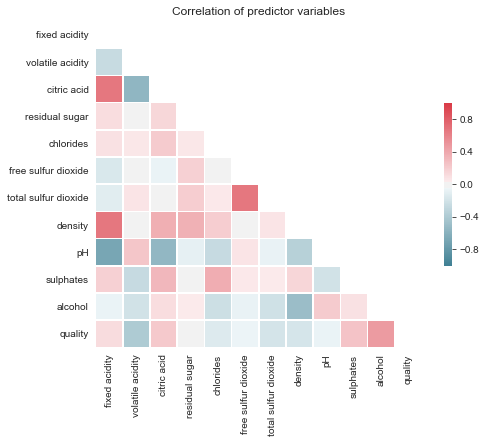

In [29]:
reg.plot_corr_triangle(df)

A few observations from this correlation plot:
* Strong positive correlation between `fixed_acidity` and two other variables: `citric_acid` and `density`
* Strong positive correlation between `free_sulfer_dioxide` and `total_sulfer_dioxide`
* Strong negative correlation between `pH` and `fixed_acidity`

We should keep an eye on thse interactions later in the analysis, but the overall level of correlation in the dataset is reasonable to proceed.

### Assess multicollinearity

Next we will check for [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) which is a bit more insidious than direct collinearity because it can occur between multiple predictors, and therefore is not as straightforward to detect by considering each pair of predictors individually. We can test for multicollinearity using the [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) (VIF). If $ \text{VIF}(\hat{\beta}_i) > 10 $ for any of the predictors, we should consider removing them from the dataset.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_vals = [
    variance_inflation_factor(X.assign(intercept=1).values, i)
    for i in range(X.shape[1])
]

pd.Series(vif_vals, index=X.columns).round(2)

fixed acidity           7.77
volatile acidity        1.79
citric acid             3.13
residual sugar          1.70
chlorides               1.48
free sulfur dioxide     1.96
total sulfur dioxide    2.19
density                 6.34
pH                      3.33
sulphates               1.43
alcohol                 3.03
dtype: float64

None of the VIF values for any of the predictors are grater than 10, so we can proceed. The predictors `density` and `fixed_acidity` both have VIFs above 5, so we could later revisit fitting a model without those variables to see if it improves predictive performance.

### Data quality

Linear models don't handle null or infinite values well, so let's make sure our dataset does not contain those.

In [31]:
_ = reg.check_assumptions_for_linear_model(df)

[✔] No columns with infinite values
[✔] No columns with null values


## EDA

### Overview of DataFrame
We can get a good overview of the raw data we are working with using the `pandas-profiling`, which generates and embeds an interactive HTML report from our initial dataframe.

In [32]:
df.profile_report()

I like `pandas-profiling` because it quickly generates a bunch of 1D plots to perform easy EDA. From these plots we can see that most of the predictors have reasonably "normal-ish" unimodal distributions, so we won't need to perform too many data transformations before modeling. One exception here is the `citric_acid` variable, which has a meaningful proportion of zero-valued data points. This may be a case of missing data encoded as 0 instead of `NULL`.

### Distribution of response variable

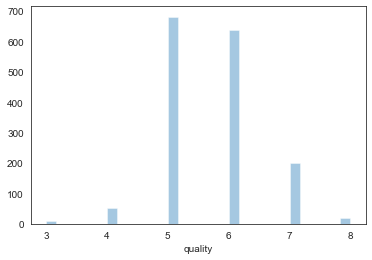

In [33]:
sns.set_style("white")
_ = sns.distplot(df[RESP_COL], kde=False)

### Correlation w/ response

We can take the five features with the strongest correlation with our response variable `quality` from the above grid and look more closely at each with a bar chart.

alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
Name: quality, dtype: float64

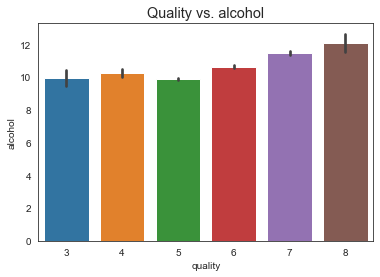

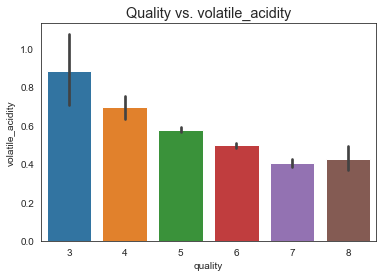

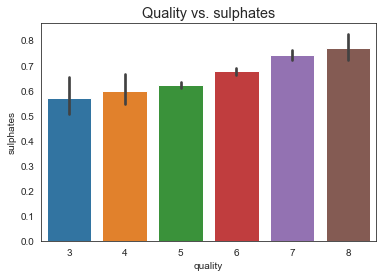

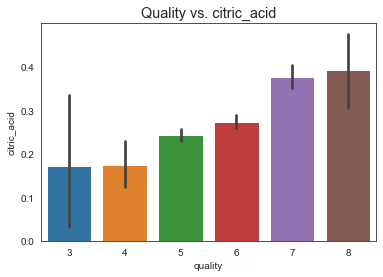

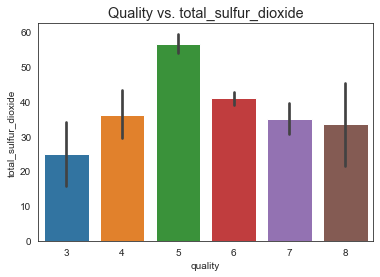

In [34]:
top_corr = df.corr()['quality'].drop('quality').abs().sort_values(ascending=False).nlargest(5)
top_corr

for x in top_corr.index:
    fig = plt.figure(figsize = (6,4))
    _ = sns.barplot(x = 'quality', y = x, data = df)
    _ = plt.title(f'Quality vs. {x}', size='x-large')

Most of the relationships between top predictors and our response variable `quality` are monotonic linear relationships. The exception is `total_sulfur_dioxide`, in which medium-quality wines have a high value of sulfur, whereas both high- and low-quality wines have lower value.

### Correlation between predictors

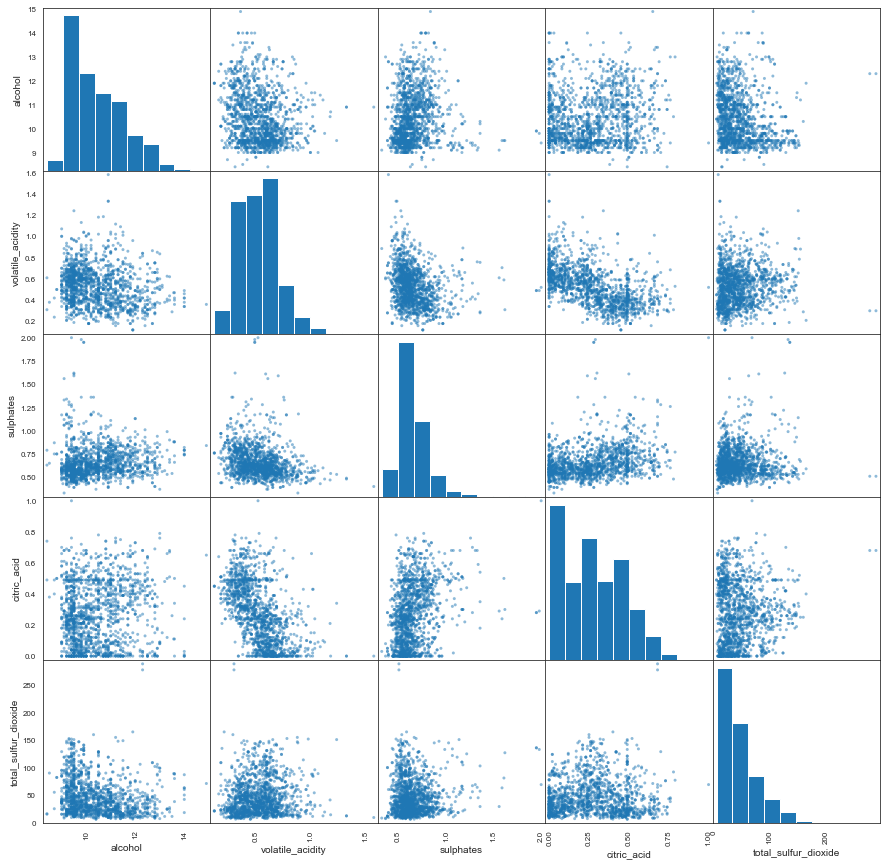

In [35]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df[top_corr.index], figsize=(15, 15))

## Modeling

### Choosing an evaluation metric

We have a few typical choices for an evaluation metric, with which we will measure the performance of our models.

**Root Mean Square Error (RMSE)** – The "typical" level of residuals between observed and predicted data. Expressed in actual units, but with a high penalty associated with outliers. Main drawvback is that it cannot easily be compared between different datasets.

$$ RMSE = \frac{1}{n} \sqrt{ \sum{(\hat{y}_i - y_i)}} $$
 
<br>

**Mean Absolute Error (MAE)** – MAE is an accuracy measure which is similar to RMSE, but instead of squaring each error term, an absolute value is taken. This has the effect of placing less "weight" on extreme residuals. This makes it more robust to outliers. The drawback is that it's also more difficult to compute, but that is usually not a problem for simple models.

$$ MAE = \frac {1}{n} \sum | \hat{y}_i - y_i | $$

<br>

**Coeffecient of Determination ($R^2$)** – Proportion of variability in $Y$ which is explained by the model. This has the nice property of generally being in the range $ [0, 1] $, although a model which is consistently worse than random predictions could have a negative R-squared value. This is useful for interpretability.

$$ R^2 =
\frac{TSS - RSS}{TSS} = 
1 - \frac{RSS}{TSS} =
1 - \frac {\sum(y_i - \hat{y})^2} {\sum (y_i - \bar{y})^2 }  $$

<br>

Since we don't seem to have any extreme outliers, let's proceed with R^2, for the sake of interpretability.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
from collections import namedtuple
ModelRun = namedtuple('ModelRun', ['name', 'params', 'r2', 'rmse', 'mae', 'preds'])

runs = []

## Linear models

In [38]:
from regression import fit_eval_reg_with_CV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

### Linear Regression

R^2: 	 0.3516
RMSE: 	 0.6577
MAE: 	 0.509

Selects 11 out of 11 features.
alcohol                 0.234347
sulphates               0.206785
volatile acidity       -0.170860
total sulfur dioxide   -0.115199
density                -0.104336
fixed acidity           0.092991
chlorides              -0.075585
residual sugar          0.064518
free sulfur dioxide     0.060173
citric acid            -0.049057
Name: coef, dtype: float64


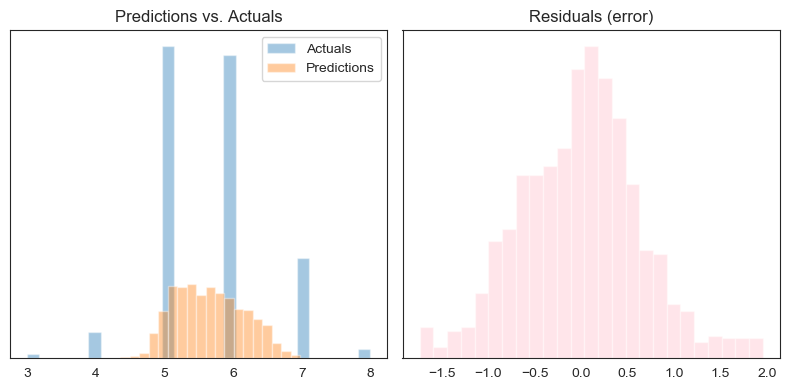

In [39]:
params = {}

pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('power_tx', PowerTransformer()),
        ('clf', LinearRegression(**params))
    ])

scores, preds = fit_eval_reg_with_CV(pipeline, X_train, y_train, report_coefs=True)

reg.plot_diagnostics(y_train, preds)

Viewing a plot of predictions vs. actuals and the residuals is a good way to sanity-check a model. In this case, it is obvious that we need to transform our final predictions from continuous to discrete ratings. We can easily do this with `pandas.Series.round(0)`.

R^2: 	 0.2243
RMSE: 	 0.7194
MAE: 	 0.4472


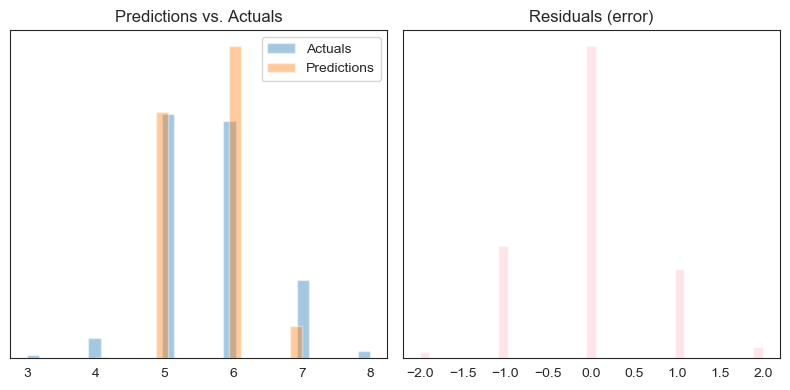

In [40]:
disc_preds = preds.round(0)

scores = reg.score_reg_preds(y_train, disc_preds)
reg.plot_diagnostics(y_train, disc_preds)
runs.append(ModelRun(name='LinearRegression', params=params, r2=scores['R^2'], rmse=scores['RMSE'], mae=scores['MAE'], preds=preds))

Discretization of our predictions actually results in a lower R^2, but we're going to keep it because it reflects the nature of the problem — if the wine quality values are discrete, providing continuous predictions does not make sense. 

### Lasso Regression

Lasso is a type of regression model which includes a penalty on the number of non-zero coefficients, so it should help us with feature selection.

R^2: 	 0.3501
RMSE: 	 0.6585
MAE: 	 0.5101

Selects 11 out of 11 features.
alcohol                 0.241340
sulphates               0.200852
volatile acidity       -0.167607
total sulfur dioxide   -0.104126
density                -0.088490
fixed acidity           0.076262
chlorides              -0.073627
residual sugar          0.054988
free sulfur dioxide     0.048511
pH                     -0.040121
Name: coef, dtype: float64


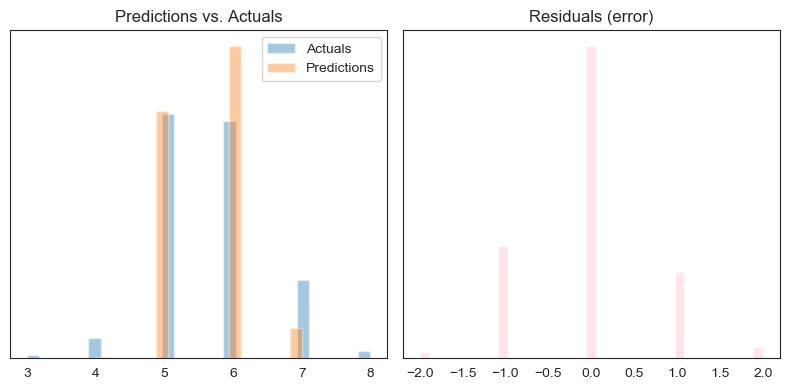

In [41]:
params = {'cv': 5}

pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('power_tx', PowerTransformer()),
        ('clf', LassoCV(**params))
    ])

scores, preds = fit_eval_reg_with_CV(pipeline, X_train, y_train, report_coefs=True)
preds = preds.round(0)

reg.plot_diagnostics(y_train, preds)

runs.append(ModelRun(name='LassoCV', params=params, r2=scores['R^2'], rmse=scores['RMSE'], mae=scores['MAE'], preds=preds))

### Understanding how Lasso shrinks coefficients as `alpha` increases

Our `LassoCV` estimator automatically selects the best value of `alpha`, but we can also take a peek under the hood to get a better sense of what its doing. 

This plot show us the the path that coefficients take as the Lasso applies progressively more shrinkage. The x-axis represents more ↔ less shrinkage, and ultimately all coefficients go to zero. As we move rightward along the x-axis, the model becomes closer to a simple `LinearRegression` model without regularization term.

Computing regularization path using the lasso...


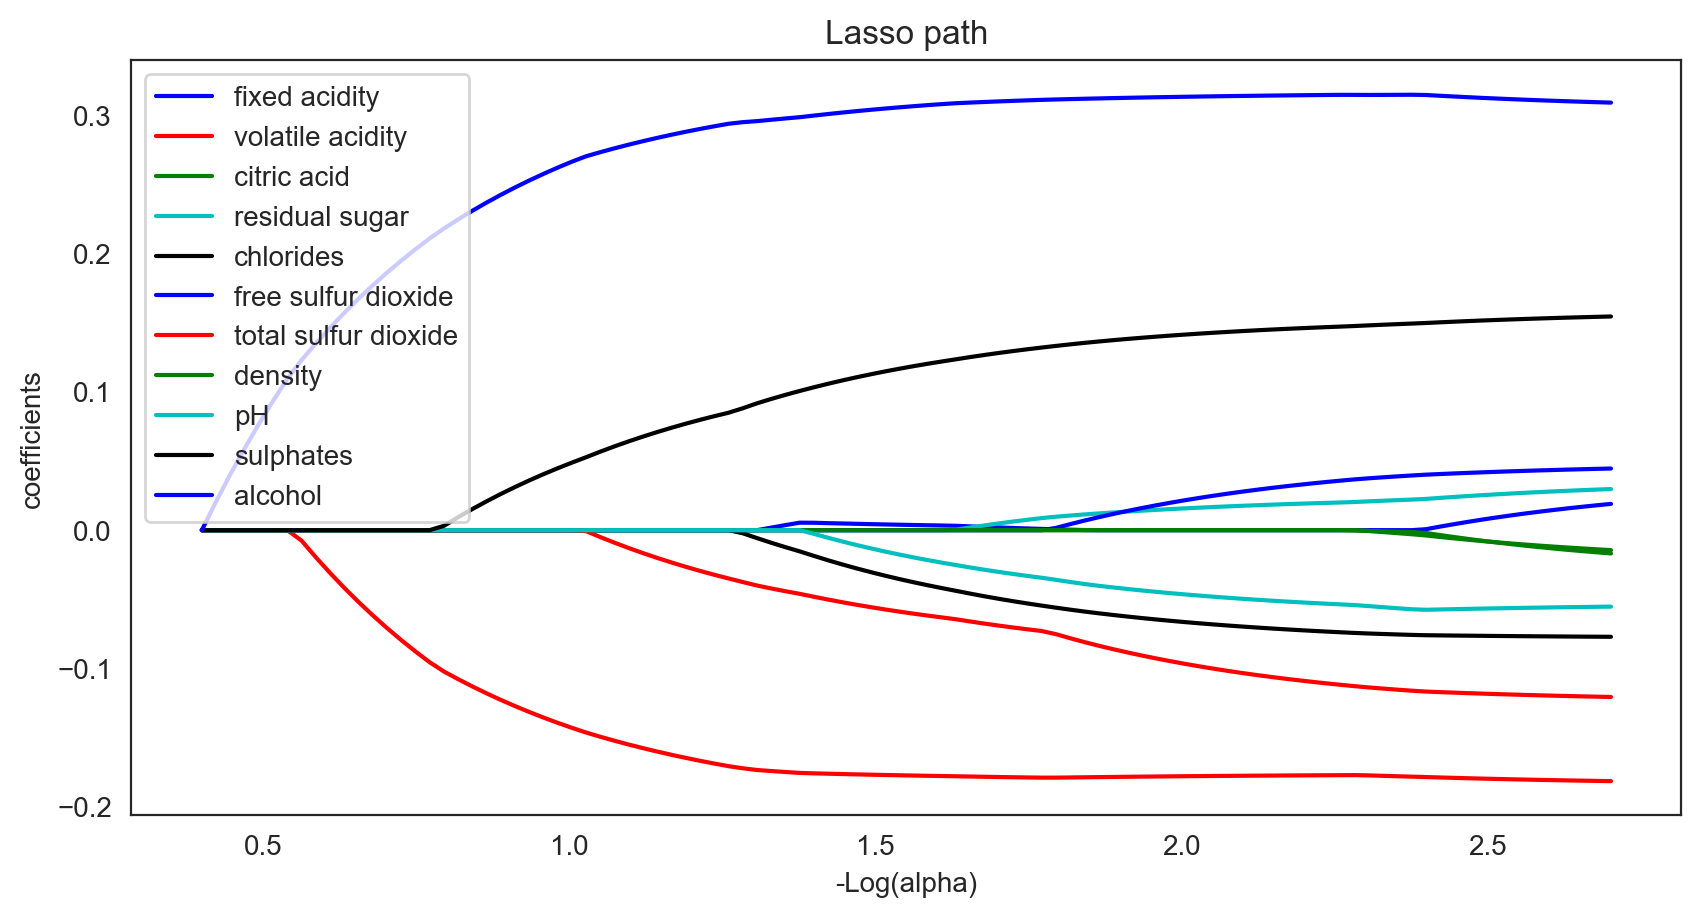

In [42]:
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[X_train_scaled.columns] = scaler.fit_transform(X_train_scaled[X_train_scaled.columns])

reg.sklearn_lasso_coefs_plot(X_train_scaled, y_train)

### Picking the best value of `alpha`

We can loop over a bunch of potential parameter values—similar to above—but this time keep track of our performance at each point. Taking the average performance gives us a curve, the minimum of which represents our ideal `alpha`.

Computing regularization path using the coordinate descent lasso...
Best alpha: 0.0002392


fixed acidity           0.006225
volatile acidity       -1.050492
citric acid            -0.110607
residual sugar          0.018643
chlorides              -1.575818
free sulfur dioxide     0.004741
total sulfur dioxide   -0.003857
density                -0.000000
pH                     -0.401496
sulphates               0.901014
alcohol                 0.304053
dtype: float64

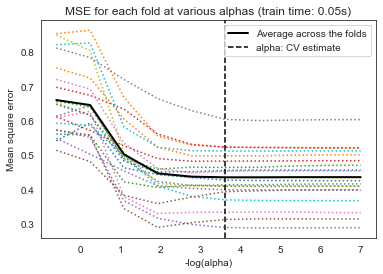

In [43]:
model = reg.find_best_alpha(X_train, y_train)
pd.Series(model.coef_, index=X_train.columns)

In our case, the curve decreases monotonically and then flattens out. This indicates that there is not much benefit to be gained by regularization here. This is probably due to the fact that we are using quite a small set of predictors to begin with, and none of them have extreme collinearity.

## Tree-based models

We will fit a few different models in ascending order of complexity:
1. Random forest
2. Gradient-boosting machine (GBM)
3. XGBoost (the old king)
4. LightGBM

Finally we will perform some hyperparameter tuning on the best "out-of-the-box" model.

### Random forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

params = {} #{'n_estimators': 50}

pipeline = Pipeline([
        ('clf', RandomForestRegressor(**params))
    ])

scores, preds = fit_eval_reg_with_CV(pipeline, X_train, y_train, cv=20, report_coefs=False)
preds = preds.round(0)

runs.append(ModelRun(name='RandomForestRegressor', params=params, r2=scores['R^2'], rmse=scores['RMSE'], mae=scores['MAE'], preds=preds))

R^2: 	 0.3925
RMSE: 	 0.6367
MAE: 	 0.4561


### scikit-learn GBM

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

params = {}

scores, preds = fit_eval_reg_with_CV(GradientBoostingRegressor(**params), X_train, y_train, cv=20, report_coefs=False)
preds = preds.round(0)

runs.append(ModelRun(name='GradientBoostingRegressor', params=params, r2=scores['R^2'], rmse=scores['RMSE'], mae=scores['MAE'], preds=preds))

R^2: 	 0.3903
RMSE: 	 0.6378
MAE: 	 0.4893


### XGBoost

In [46]:
from xgboost import XGBRegressor

params = {'verbose': False}

scores, preds = fit_eval_reg_with_CV(XGBRegressor(**params), X_train, y_train, cv=20, report_coefs=False)
preds = preds.round(0)

runs.append(ModelRun(name='XGBRegressor', params=params, r2=scores['R^2'], rmse=scores['RMSE'], mae=scores['MAE'], preds=preds))

[19:13:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

### LightGBM

In [47]:
from lightgbm import LGBMRegressor

params = {}

scores, preds = fit_eval_reg_with_CV(LGBMRegressor(**params), X_train, y_train, cv=20, report_coefs=False)
preds = preds.round(0)

runs.append(ModelRun(name='LGBMRegressor', params=params, r2=scores['R^2'], rmse=scores['RMSE'], mae=scores['MAE'], preds=preds))

R^2: 	 0.4355
RMSE: 	 0.6137
MAE: 	 0.4458


### Hyperparameter search

In [48]:
from sklearn.model_selection import GridSearchCV

def optimize_params(estimator, param_dict: dict, scoring: str) -> dict:
    """ Perform grid search across some given parameters and return best set """
    grid_search = GridSearchCV(estimator, param_grid, scoring=scoring, cv=3, n_jobs=-1)
    grid_search.fit(X, y)
    
    results_df = (pd.DataFrame({'mean': grid_search.cv_results_['mean_test_score'],
                                'std': grid_search.cv_results_['std_test_score']},
                               index=grid_search.cv_results_['params']))
    
    results_df.sort_values(by='mean', ascending=False).pipe(display)
    
    print('Best parameters found by grid search are:', grid_search.best_params_)
    return grid_search.best_params_

model = LGBMRegressor(n_jobs=3)

param_grid = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20],
    'n_estimators': [10, 25, 50, 75, 100, 125],
    'max_depth': [15, 20, 25, 30]
}

params = optimize_params(model, param_grid, scoring='r2')  # {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 80}
model.set_params(**params)

scores, y_proba = reg.fit_eval_reg_with_CV(model, X_train, y_train, report_coefs=False)

,mean,std
"{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 25}",0.334422,0.025796
"{'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 25}",0.334422,0.025796
"{'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 25}",0.334422,0.025796
"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 25}",0.331327,0.027725
"{'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 50}",0.330812,0.022520
...,...,...
"{'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 100}",0.193359,0.013393
"{'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 100}",0.190885,0.013463
"{'learning_rate': 0.2, 'max_depth': 25, 'n_estimators': 125}",0.187266,0.011288
"{'learning_rate': 0.2, 'max_depth': 30, 'n_estimators': 125}",0.187266,0.011288


Best parameters found by grid search are: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 25}


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=20,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=25, n_jobs=3, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

R^2: 	 0.4058
RMSE: 	 0.6296
MAE: 	 0.4851


## Summary

### Performance results

,r2,rmse,mae
model,,,
LGBMRegressor,0.435522,0.613702,0.445814
RandomForestRegressor,0.392492,0.636663,0.456059
GradientBoostingRegressor,0.390283,0.637820,0.489291
XGBRegressor,0.386992,0.639539,0.492485
LassoCV,0.350148,0.658478,0.510060
LinearRegression,0.224253,0.719439,0.447224


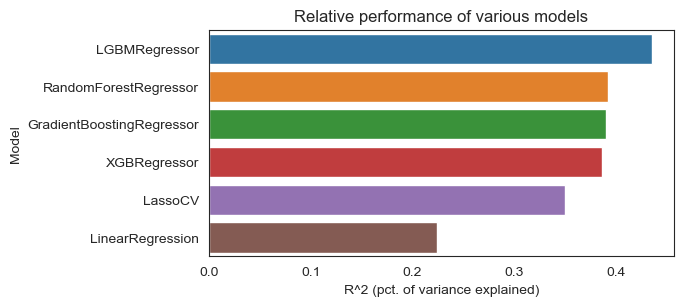

In [49]:
results = (pd.DataFrame(runs)
           .dropna()
           .drop(['preds', 'params'], axis=1)
           .sort_values(by='r2', ascending=False)
           .rename(columns={'name': 'model'})
           .set_index('model'))

results

def plot_model_performance(results_df):
    fig, ax = plt.subplots(figsize=(6, results_df.shape[0]/2), dpi=100)
    sns.barplot(y='model', x='r2', data=results_df.reset_index(), ax=ax)
    plt.title('Relative performance of various models')
    plt.xlabel('R^2 (pct. of variance explained)')
    plt.ylabel('Model')
    
plot_model_performance(results)

### Out-of-sample performance on hold-out set

Finally, we will check the performance of our best model on the holdout set, to ensure it has reasonable predictive power going forward.

In [56]:
from sklearn.metrics import r2_score

best_model = results['r2'].idxmax()

model = LGBMRegressor()
model.fit(X_train, y_train)

test_r2 = r2_score(y_test, model.predict(X_test))

print(f'Our best peforming model is {best_model}. \nWhen used to make predictions on our holdout set, it yields an R^2 of {test_r2:0.4}.')

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Our best peforming model is LGBMRegressor. 
When used to make predictions on our holdout set, it yields an R^2 of 0.4386.
